### Auto - mpg data set <br>
### Perform linear Regression,Ridge and Lasso Regression

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [8]:
data =pd.read_csv(r'C:\Users\nav30_000\Desktop\machine_data\New folder\auto-mpg.csv')

In [9]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [10]:
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [11]:
data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [12]:
 '?' in data

False

In [13]:
data.drop(['car name'],axis=1,inplace=True)
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [14]:
data.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [15]:
data = data[data.horsepower != '?']

In [16]:
data.shape

(392, 8)

In [17]:
data.corr()['mpg'].sort_values()

weight         -0.832244
displacement   -0.805127
cylinders      -0.777618
acceleration    0.423329
origin          0.565209
model year      0.580541
mpg             1.000000
Name: mpg, dtype: float64

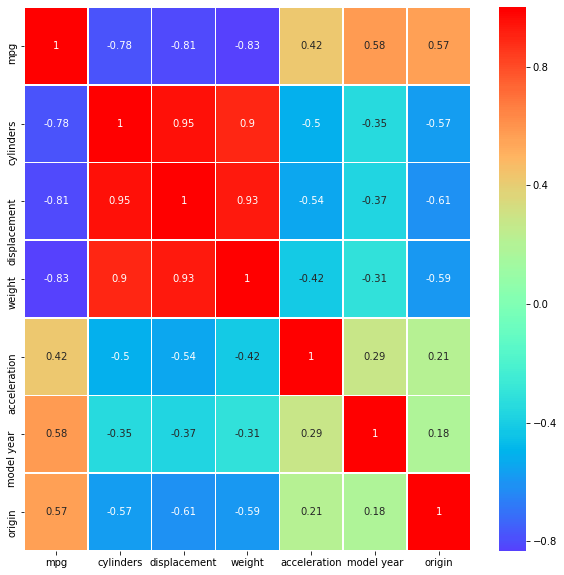

In [18]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,linewidth=0.5,center=0,cmap='rainbow')
plt.show()

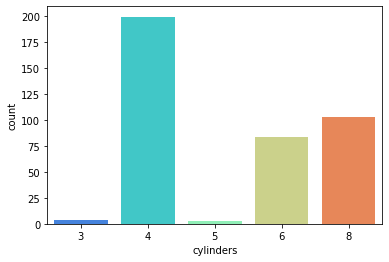

In [19]:
sns.countplot(data.cylinders,data=data,palette = "rainbow")
plt.show()

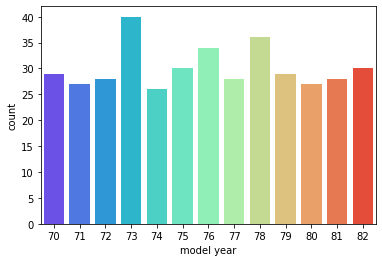

In [20]:
sns.countplot(data['model year'],palette = "rainbow")
plt.show()

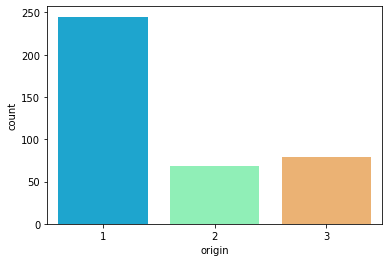

In [21]:
sns.countplot(data.origin,palette = "rainbow")
plt.show()

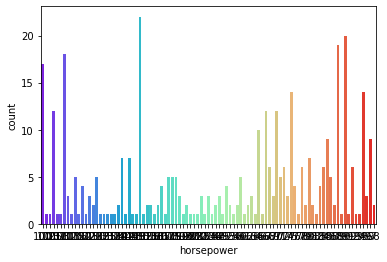

In [22]:
sns.countplot(data.horsepower,palette = "rainbow")
plt.show()

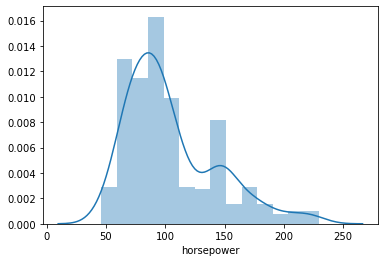

In [23]:
data['horsepower'] = pd.to_numeric(data['horsepower'])
sns.distplot(data['horsepower'])
plt.show()

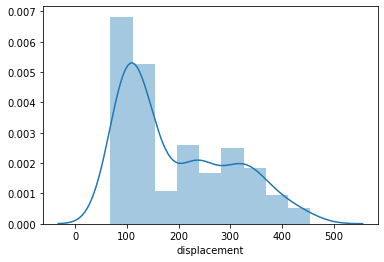

In [24]:
sns.distplot(data.displacement,rug=False)
plt.show()

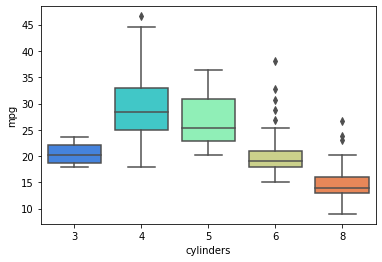

In [25]:
sns.boxplot(y='mpg',x='cylinders',data=data,palette = "rainbow")
plt.show()

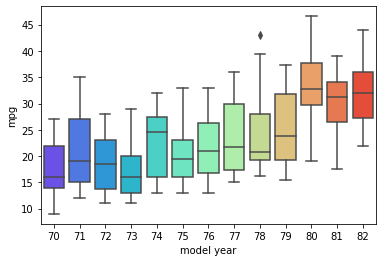

In [26]:
sns.boxplot(y='mpg',x='model year',data=data,palette = "rainbow")
plt.show()

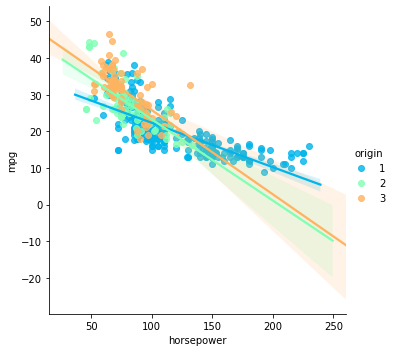

In [27]:
plot = sns.lmplot('horsepower','mpg',data=data,hue='origin',palette = "rainbow")
plt.show()

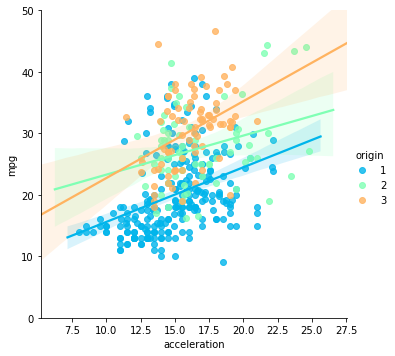

In [28]:
plot = sns.lmplot('acceleration','mpg',data=data,hue='origin',palette = "rainbow")
plot.set(ylim = (0,50))
plt.show()

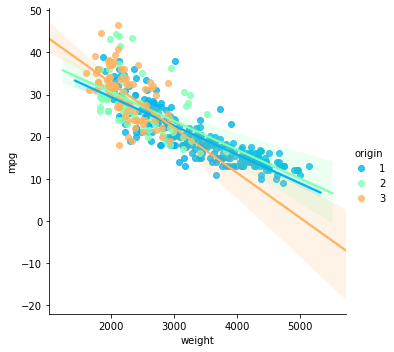

In [29]:
plot = sns.lmplot('weight','mpg',data=data,hue='origin',palette = "rainbow")
plt.show()

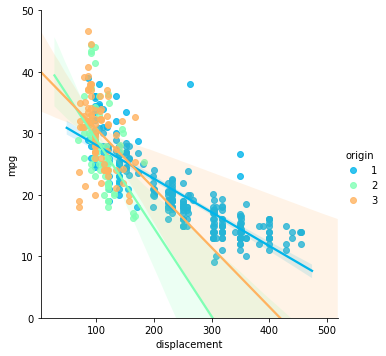

In [30]:
plot = sns.lmplot('displacement','mpg',data=data,hue='origin',palette = "rainbow")
plot.set(ylim = (0,50))
plt.show()

In [31]:
X = data.iloc[:,1:].values
Y = data.iloc[:,0].values

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
warnings.filterwarnings("ignore",category=DeprecationWarning)
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=0)

In [33]:
regressor = LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
Y_pred = regressor.predict(X_test)
print(regressor.score(X_train,Y_train))
print(regressor.score(X_test,Y_test))

0.8195973557538925
0.8191428142279116


In [35]:
from sklearn.metrics import mean_squared_error

In [36]:
mean_squared_error(Y_test,Y_pred)

11.125530446601514

In [37]:
np.sqrt(mean_squared_error(Y_test,Y_pred))

3.335495532391179

In [38]:
from sklearn.metrics import r2_score

In [39]:
r2_score(Y_test,Y_pred)

0.8191428142279116

### Perform Regularization methods (Ridge and Lasso regression)

In [40]:
mpg_df =pd.read_csv(r'C:\Users\nav30_000\Desktop\machine_data\New folder\auto-mpg.csv')

In [41]:
mpg_df = mpg_df.drop('car name', axis=1)

In [42]:
mpg_df = mpg_df.replace('?', np.nan)

In [43]:
mpg_df = mpg_df.apply(lambda x: x.fillna(x.median()),axis=0)

In [44]:
X = mpg_df.drop('mpg', axis=1)

In [45]:
y = mpg_df[['mpg']]

In [46]:
from sklearn import preprocessing

# scale all the columns of the mpg_df. This will produce a numpy array
X_scaled = preprocessing.scale(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)  # ideally the training and test should be 

y_scaled = preprocessing.scale(y)
y_scaled = pd.DataFrame(y_scaled, columns=y.columns)

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.30, random_state=1)

In [48]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for cylinders is -0.0856143689556271
The coefficient for displacement is 0.30441822535930224
The coefficient for horsepower is -0.09718466302484265
The coefficient for weight is -0.7628632829136758
The coefficient for acceleration is 0.02159127517292448
The coefficient for model year is 0.37494080741187136
The coefficient for origin is 0.1230263702455686


In [49]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [50]:
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))

Ridge model: [[-0.08073002  0.28822207 -0.09985675 -0.75105509  0.0191277   0.37378312
   0.12212717]]


In [51]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))

Lasso model: [-0.         -0.         -0.01328    -0.62052079  0.          0.29198733
  0.02156765]


### Compare their scores

In [52]:
print(regression_model.score(X_train, y_train))
print(regression_model.score(X_test, y_test))

0.8081802739111359
0.8472274567567306


In [53]:
y_pred=regression_model.predict(X_test)
mean_squared_error(y_test,y_pred)

0.14658208429020425

In [54]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.8081651504849107
0.8475401122140555


In [55]:
y_pred=ridge.predict(X_test)
mean_squared_error(y_test,y_pred)

0.1462820978683875

In [56]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.7853770917055521
0.8277658025171161


In [57]:
y_pred=lasso.predict(X_test)
mean_squared_error(y_test,y_pred)

0.16525513758640684

In [58]:
# More or less similar results but with less complex models.  Complexity is a function of variables and coefficients
## Note - with Lasso, we get equally good result in test though not so in training.  Further, the number of dimensions is much less
# in LASSO model than ridge or un-regularized model

In [59]:
from sklearn.preprocessing import PolynomialFeatures

In [60]:
poly = PolynomialFeatures(degree = 2, interaction_only=True)

In [61]:
X_poly = poly.fit_transform(X_scaled)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.30, random_state=1)
X_train.shape

(278, 29)

### Generate polynomial models reflecting the non-linear interaction between some dimensions

In [62]:
regression_model.fit(X_train, y_train)
print(regression_model.coef_[0])

[ 2.76250572e+13  7.27451322e-01 -1.39200215e+00 -1.77677191e+00
 -4.68903156e+00 -3.89906258e-01  2.90680427e+00  6.20842151e-01
  1.69727016e-01 -1.78810611e-01  1.40501753e+00  7.12285551e-01
 -1.05870574e+00  2.99702020e-01  1.48224971e-01  8.61984176e-01
 -5.24657821e-01  3.00085759e+00  2.04143370e+00 -1.53573088e-01
 -9.54261900e-01 -1.51137932e+00  1.60778236e+00  5.77405395e-01
 -5.32841470e-01 -1.89857628e+00  5.00806874e-01  1.50533135e+00
  1.10253666e+00]


In [63]:
print(regression_model.score(X_train, y_train))
print(regression_model.score(X_test, y_test))

0.8887225258785965
0.86011284138165


In [64]:
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))

Ridge model: [[ 0.          0.64813084 -0.36554878 -2.46919357 -4.70667241 -0.63510083
   2.8499319   0.96173248 -0.49248204 -0.57492325  1.37951065  1.0927984
  -1.42036657  0.89110432 -0.16927823  1.35119104 -1.1349459   3.21038276
   1.16514278  0.22836119 -0.89663938 -1.35284633  0.79573939  0.58576253
  -0.61776911 -0.88637153  0.54014514  1.23036832  0.88256903]]


In [65]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.8924614223751737
0.8615025469455584


In [66]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))

Lasso model: [ 0.          0.2994648  -0.08787231 -2.43642026 -4.7023043  -0.41557099
  2.82883219  0.79630585 -0.63845609 -0.19106524  1.35870323  0.71048483
 -0.95232354  0.80157019 -0.          1.30713909 -0.22245995  2.23244448
  0.41856317  0.         -0.68238432 -1.20299711  0.33414503  0.06086321
 -0.38005578 -0.07856802  0.52335532  1.11608276  0.72523195]


In [67]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.8910435407965047
0.8679233223131171


Ridge and lasso Regression increases the accuracy.